# Background

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

In this analysis we will find out amswers to questions such as these with analysing the data given.

The dataset source is: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

# Questions to answer

Based on the dataset we will be asking questions such as:

Q1) What is the relationship of budget and revenue?  
Q2) Which genres are popular with people?  
Q3) Which director has the highest revenue under his/her belt?  
Q4) Which is the most popular and highest revenue grossing actor?  
Q5) Which year was the highest revenue and profit collection?  
Q6) Do popularity affect movie revenue and profit?

We will see if we can add more questions in this but will start by all these questions only

# Flow of the code

Flow of the code will be in following steps

Step 1) Load and merge movies and credits dataset so we create a master dataframe.  
Step 2) We will do basic data engineering where we will see if there are missing values, duplicates and other things and then will make changes accordingly.  
Step 3) We will find out all the columns that we need for analysis and drop every other column that doesn't matter.  
Step 4) For each column which we need to analyse, we will create a corresponding temporary dataframe to analyse and get out answers. For example, if we want to see how budget affects profitability, we will create a temporary budget dataframe inside which we will do all the chartings.  
Step 5) After completing this, we will create a last section for text answers based on our observation of the data

## Step 1: Load and Merge

In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import json

In [6]:
#adding data to df
df_movies = pd.read_csv(r'C:\Users\ACER\Downloads\Python Projects\IMDB Movies\tmdb_5000_movies.csv', parse_dates=['release_date'], dayfirst=True)
df_credits = pd.read_csv(r'C:\Users\ACER\Downloads\Python Projects\IMDB Movies\tmdb_5000_credits.csv')

In [7]:
#join the two tables
df = df_movies.merge(right = df_credits, how = 'inner', left_on = 'id', right_on = 'movie_id')

In [8]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


Now on the first look we can see that the dataframe has columns which have one single value in each row and there are column who seemingly have list and dictionaries in their values. We will explore this further.

## Step 2 and 3: Data Engineering and Keeping relevant columns

We will now make changes to data such as adding columns or deleting columns and filling null values or deleting duplicated.

In [11]:
# Check for null values

df.isnull().sum()/len(df)*100

#We have used this percentage style so as to understand if there might be a huge impact on missing values on our data. For now it doesnt seem like it

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title_x                  0.000000
vote_average             0.000000
vote_count               0.000000
movie_id                 0.000000
title_y                  0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

In [12]:
# we will now delete columns which we do not need

df.drop(['movie_id','homepage','tagline','overview','production_countries', 'original_title','status','spoken_languages'], axis=1, inplace=True)
df.drop(['title_y'], axis=1, inplace=True)

In [13]:
# we will add columns to enhance our data such as profit and profit margin
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit']/df['revenue']*100

In [14]:
df.isnull().sum()/len(df)*100

budget                   0.000000
genres                   0.000000
id                       0.000000
keywords                 0.000000
original_language        0.000000
popularity               0.000000
production_companies     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
title_x                  0.000000
vote_average             0.000000
vote_count               0.000000
cast                     0.000000
crew                     0.000000
profit                   0.000000
profit_margin           18.530085
dtype: float64

We see here that even though we have seemingly no null value in revenue, budget profit, there are null values in profit margin. This can be due to the fact that there could be zero revenue or movies with budget 0 (maybe they were cancelled) which has created this issue. To fix that we will fix that there should be no calculation using 0.

In [16]:
df['profit_margin_fixed'] = np.where(
    df['revenue'] == 0,
    0,  # or another default value
    (df['profit']/df['revenue']) * 100
)

df.isnull().sum()/len(df)*100

We can now see that the fixed column has no null values as we have hardcoded 0 for any value which doesnt help us

## Step 4: Analysis Based on the Questions

Before we start on any questions we will lay a picture of the data that we currently have to see what kind of distribution we have in values

In [21]:
display(round(df.describe(),2).T) #adding this T gives a clean table

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,29045039.88,4.072239e+07,0.000000e+00,790000.00,15000000.00,40000000.00,3.800000e+08
id,4803.0,57165.48,8.869461e+04,5.000000e+00,9014.50,14629.00,58610.50,4.594880e+05
popularity,4803.0,21.49,3.182000e+01,0.000000e+00,4.67,12.92,28.31,8.755800e+02
revenue,4803.0,82260638.65,1.628571e+08,0.000000e+00,0.00,19170001.00,92917187.00,2.787965e+09
runtime,4801.0,106.88,2.261000e+01,0.000000e+00,94.00,103.00,118.00,3.380000e+02
vote_average,4803.0,6.09,1.190000e+00,0.000000e+00,5.60,6.20,6.80,1.000000e+01
vote_count,4803.0,690.22,1.234590e+03,0.000000e+00,54.00,235.00,737.00,1.375200e+04
profit,4803.0,53215598.78,1.359677e+08,-1.657101e+08,-799537.50,2511317.00,55312860.00,2.550965e+09
profit_margin,3913.0,-inf,NaN,-inf,-83.33,49.98,76.89,1.000000e+02
profit_margin_fixed,4803.0,-88843.80,3.487269e+06,-1.916666e+08,0.00,20.13,71.82,1.000000e+02


On first look, we can see that for numerical values
- Budget has the minimum of 0 and that can only happen if the movie is not made. So we can exclude movies with budget of 0
- There are missing values in runtime and profit_margin column. Runtime has enough values where this missing does not create that much of problem and for profit margin we have created an alternative fixed column.
- Lowest value in popularity is 0 but the highest is 8.755800e+02 which does not match as popularity should ideally be scaled from 0-10. This has also created trouble in mean. We will need to find a better way to interpret this

In [23]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370
keywords,4803,4222,[],412
original_language,4803,37,en,4505
production_companies,4803,3697,[],351
release_date,4802,3280,2006-01-01,10
title_x,4803,4800,The Host,2
cast,4803,4761,[],43
crew,4803,4776,[],28


On the first look for categorical values
- We can see that drama is the biggest genre
- We can see that keywords, cast, crew, and production companies have blank list. We need to delete these blank lists to make proper judgetments.
- In title_x (we will rename it) there is a duplicate of The Host. We will see if these are two different The Host or a duplicate

Now that we know these things we can start our analysis.

### Q1) What is the relationship of budget and revenue?

To assess this relationship, we need following columns
- budget
- revenue
- profit
- profit margin

We first find the correlation between budget, revenue, profit, and profit margin using pearson correlation

In [29]:
#We have created a seperate dataframe for budget to make changes in this controlled dataframe only

columns_to_assign = ['title_x','budget', 'revenue', 'profit', 'profit_margin']
df_budget = df[columns_to_assign]
df_budget = df_budget.query('budget > 0') # as we saw there are movies with 0 budget we do not need that
df_budget.head(3)

,title_x,budget,revenue,profit,profit_margin
0,Avatar,237000000,2787965087,2550965087,91.499176
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,68.782518
2,Spectre,245000000,880674609,635674609,72.180417


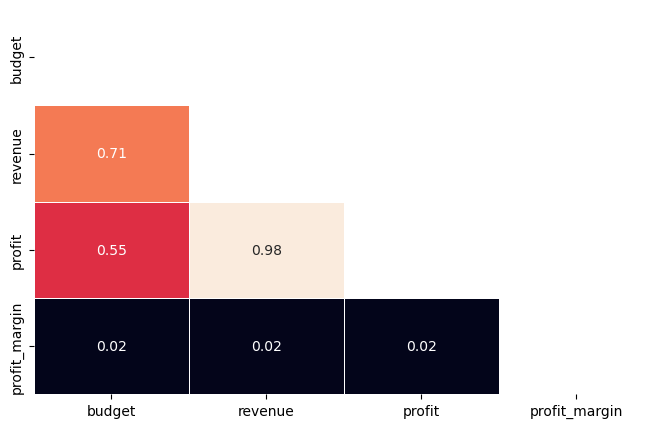

In [30]:
#Correlation

corr = df_budget.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(corr)) #this is to define the treatment of missing values
fig = plt.subplots(figsize=(8,5))
sns.heatmap(corr,annot=True,fmt='.2f',mask=mask,cbar=None,linewidth=0.5)
plt.show()

We can see that there is some relation between budget and revenue and budget and profit. We will now see these two pairs and their relationship

Text(0, 0.5, 'Revenue (100 million)')

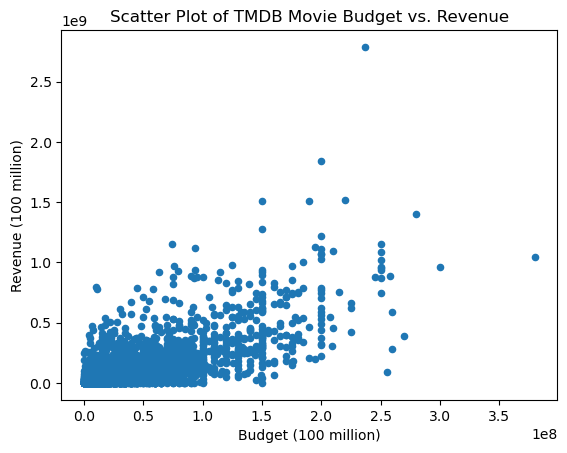

In [32]:
# Budget VS Revenue

df_budget.plot(y='revenue',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)")

Text(0, 0.5, 'Profit (100 million)')

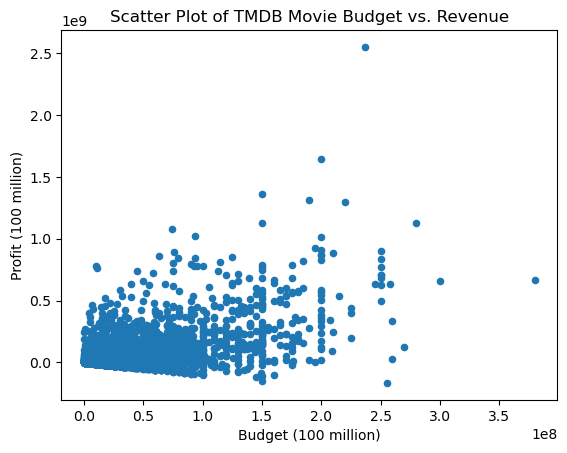

In [33]:
# Budget VS Profit

df_budget.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Profit (100 million)")

For both revenue and profit, we can see that many movies who have higher budgets have gotten success in converting revenue and profitability but there seems to be some observations which say otherwise. A few movies which cross the $100 million mark, it is not necessary that the movie will give revenue and profitability.

We can see top 10 movies in budget and judge for ourselves

In [36]:
# Groupby Movie Title and Budget, Revenue and Profit for Top 10 Movies
df_budget_grouped = df_budget.groupby('title_x')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
df_budget_grouped

,budget,revenue,profit
title_x,,,
Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Avengers: Age of Ultron,280000000,1405403694,1125403694
Superman Returns,270000000,391081192,121081192
Tangled,260000000,591794936,331794936
John Carter,260000000,284139100,24139100
Spider-Man 3,258000000,890871626,632871626
The Lone Ranger,255000000,89289910,-165710090
X-Men: Days of Future Past,250000000,747862775,497862775


We can see that The Lone Ranger is a loss which shows that budget alone cannot pull profits.

### Q2) What genres are popular with people?

To assess this relationship, we need following columns
- popularity
- genres
- revenue
- profit

As we know that genres column have values in json format, we will need to make it readable at first.

In [41]:
def parse_list_of_dicts(df, column_name, prefix=""):
    """
    Parse a column containing a list of dictionaries and create separate rows for each dictionary.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    column_name (str): Name of column containing list of dictionaries
    prefix (str): Prefix for new column names (optional)
    
    Returns:
    pandas.DataFrame: DataFrame with expanded rows from the list of dictionaries
    """
    # Convert string representation of list of dicts to actual list of dicts
    try:
        df['temp_dict'] = df[column_name].apply(ast.literal_eval)
    except:
        try:
            df['temp_dict'] = df[column_name].apply(json.loads)
        except:
            print(f"Error parsing column {column_name}. Please check the data format.")
            return df

    # Explode the list of dictionaries into separate rows
    df_exploded = df.explode('temp_dict')
    
    # Convert dictionary to columns
    dict_df = pd.json_normalize(df_exploded['temp_dict'])
    
    # Add prefix to new columns if specified
    if prefix:
        dict_df.columns = [f"{prefix}{col}" for col in dict_df.columns]
    
    # Combine with original columns
    result = pd.concat([df_exploded.drop(['temp_dict', column_name], axis=1).reset_index(drop=True), 
                       dict_df], axis=1)
    
    return result

In [42]:
# Creating a temporary dataframe

columns_to_assign = ['title_x','popularity','genres','revenue','profit']
df_genres = df[columns_to_assign]

# Reading json
df_genres = parse_list_of_dicts(df_genres,'genres')

df_genres.head()

,title_x,popularity,revenue,profit,id,name
0,Avatar,150.437577,2787965087,2550965087,28.0,Action
1,Avatar,150.437577,2787965087,2550965087,12.0,Adventure
2,Avatar,150.437577,2787965087,2550965087,14.0,Fantasy
3,Avatar,150.437577,2787965087,2550965087,878.0,Science Fiction
4,Pirates of the Caribbean: At World's End,139.082615,961000000,661000000,12.0,Adventure


We have duplicate value in title because we have multiple genres for same titles. Before anything we need to check if there are any nulls in this new data we have found.

After digging a little we found 28 missing values in a count of ~12K entries so it is no issue

In [45]:
df_genres['name'].value_counts()

name
Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64

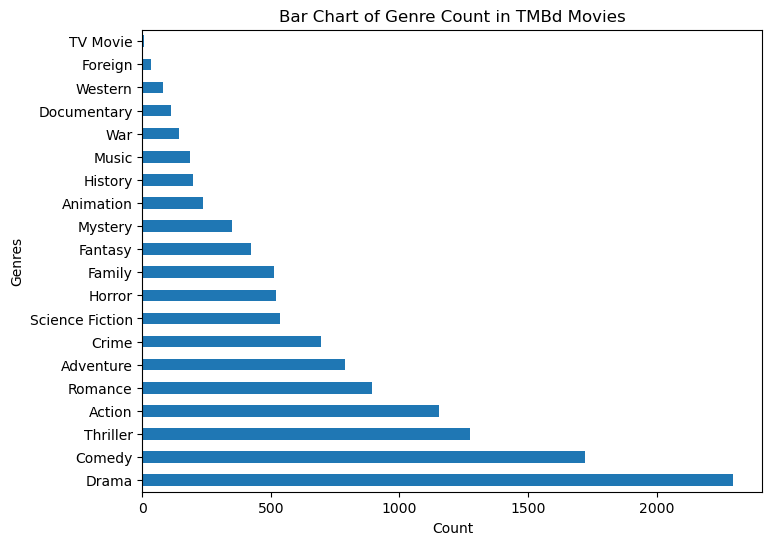

In [46]:
plt.figure(figsize=[8,6])
df_genres['name'].value_counts().plot.barh()
plt.title("Bar Chart of Genre Count in TMBd Movies")
plt.ylabel("Genres")
plt.xlabel("Count");

We see that Drama, Comedy, Thriller and Action are some of the highest occuring values. This shows us that movies under these genre are in high demand. We now need to check if they are also popular amongst people.

As we checked before, there are some issues in how the values have been inputted in popularity so now we will make a standardize measurement to make sure we can assess our question.

In [49]:
df_genres['popularity_scaled'] = df_genres['popularity'] * (10/875.58)
df_genres['popularity_scaled'].mean()
#we have standardized the rating so that we can get a good average that we can use

0.26976627442687656

In [50]:
# Now we will compare genre to popularity and see if more movies produced in this genre means more popularity amongst masses

genre_mean = df_genres.groupby('name')[['popularity_scaled','revenue','profit']].mean().sort_values('popularity_scaled', ascending=False)
genre_mean.iloc[:10,:].query("popularity_scaled > 0.26976627442687656")

,popularity_scaled,revenue,profit
name,,,
Adventure,0.448480,2.086602e+08,1.423333e+08
Animation,0.443288,2.256930e+08,1.592271e+08
Science Fiction,0.416316,1.524565e+08,1.005910e+08
Fantasy,0.415576,1.933542e+08,1.297936e+08
Action,0.353370,1.412131e+08,8.970235e+07
Family,0.317879,1.623455e+08,1.116260e+08
Mystery,0.280806,7.830093e+07,4.755644e+07
Thriller,0.279359,8.104429e+07,4.907608e+07
War,0.271560,8.415587e+07,4.887342e+07


We can see that it doesn't matter if more movies are being made in a few popular genre. The public's popular vote has gone to genres like Adventure, Animation, and Science Fiction.

### Q3) Which director has the highest revenue under his/her belt?

To assess this relationship, we need following columns:
- crew
- revenue
- profit

As we know that crew column has data about multiple roles that people perform when a movie is made. In that one of the roles is of director so we would filter out the value we need from that.

We declared a custom formula in Q2 which we will use to extract data from crew column as well

In [56]:
# We will create a temporary dataframe to hold the values we need

columns_to_assign = ['title_x','crew','revenue','profit']
df_director = df[columns_to_assign]

In [57]:
df_director = parse_list_of_dicts(df_director,'crew')
df_director.head()

,title_x,revenue,profit,credit_id,department,gender,id,job,name
0,Avatar,2787965087,2550965087,52fe48009251416c750aca23,Editing,0.0,1721.0,Editor,Stephen E. Rivkin
1,Avatar,2787965087,2550965087,539c47ecc3a36810e3001f87,Art,2.0,496.0,Production Design,Rick Carter
2,Avatar,2787965087,2550965087,54491c89c3a3680fb4001cf7,Sound,0.0,900.0,Sound Designer,Christopher Boyes
3,Avatar,2787965087,2550965087,54491cb70e0a267480001bd0,Sound,0.0,900.0,Supervising Sound Editor,Christopher Boyes
4,Avatar,2787965087,2550965087,539c4a4cc3a36810c9002101,Production,1.0,1262.0,Casting,Mali Finn


In [58]:
# We will drop unnecessary columns and filter the dataframe so we only have values from directors

#df_director = df_director.drop(columns=['credit_id','gender','id'])
df_director = df_director.drop(columns=['department'])
df_director.head()

,title_x,revenue,profit,credit_id,gender,id,job,name
0,Avatar,2787965087,2550965087,52fe48009251416c750aca23,0.0,1721.0,Editor,Stephen E. Rivkin
1,Avatar,2787965087,2550965087,539c47ecc3a36810e3001f87,2.0,496.0,Production Design,Rick Carter
2,Avatar,2787965087,2550965087,54491c89c3a3680fb4001cf7,0.0,900.0,Sound Designer,Christopher Boyes
3,Avatar,2787965087,2550965087,54491cb70e0a267480001bd0,0.0,900.0,Supervising Sound Editor,Christopher Boyes
4,Avatar,2787965087,2550965087,539c4a4cc3a36810c9002101,1.0,1262.0,Casting,Mali Finn


In [59]:
df_director = df_director[df_director['job'] == 'Director']
df_director.head()

,title_x,revenue,profit,credit_id,gender,id,job,name
6,Avatar,2787965087,2550965087,52fe48009251416c750ac9c3,2.0,2710.0,Director,James Cameron
154,Pirates of the Caribbean: At World's End,961000000,661000000,52fe4232c3a36847f800b4fd,2.0,1704.0,Director,Gore Verbinski
186,Spectre,880674609,635674609,52fe4d22c3a368484e1d8d77,2.0,39.0,Director,Sam Mendes
343,The Dark Knight Rises,1084939099,834939099,52fe4781c3a36847f8139865,2.0,525.0,Director,Christopher Nolan
558,John Carter,284139100,24139100,52fe479ac3a36847f813ea65,2.0,7.0,Director,Andrew Stanton


In [60]:
# To find how many movies have been directed by each director
df_director['name'].value_counts()

name
Steven Spielberg       27
Woody Allen            22
Martin Scorsese        21
Clint Eastwood         20
Robert Rodriguez       17
                       ..
Wallace Wolodarsky      1
Lionel C. Martin        1
Ernest R. Dickerson     1
Cheryl Dunye            1
Brett Winn              1
Name: count, Length: 2577, dtype: int64

We can see that Steven Spielberg, Woody Allen, Martin Scorsese have made the most movies so does that equate to higher revenue and profits?

In [62]:
# We will now sort them by revenue and profit both

df_director.groupby('name')[['revenue','profit']].mean().sort_values('revenue', ascending=False).head(5)

,revenue,profit
name,,
Jennifer Lee,1.274219e+09,1.124219e+09
Kyle Balda,1.156731e+09,1.082731e+09
Lee Unkrich,1.066970e+09,8.669697e+08
Joss Whedon,9.879437e+08,8.082770e+08
Pierre Coffin,8.903356e+08,8.173356e+08


In [63]:
df_director.groupby('name')[['revenue','profit']].mean().sort_values('profit', ascending=False).head(5)

,revenue,profit
name,,
Jennifer Lee,1.274219e+09,1.124219e+09
Kyle Balda,1.156731e+09,1.082731e+09
Lee Unkrich,1.066970e+09,8.669697e+08
Pierre Coffin,8.903356e+08,8.173356e+08
Joss Whedon,9.879437e+08,8.082770e+08


We can see that Jennifer Lee tops the chart by having highest revenue and profits. We will now see what movie she directed.

In [65]:
df_director.query('name == "Jennifer Lee"').sort_values('profit', ascending=False).head()

,title_x,revenue,profit,credit_id,gender,id,job,name
8287,Frozen,1274219009,1124219009,52fe4ab7c3a36847f81dddfb,1.0,1120694.0,Director,Jennifer Lee


### Q4) Which is the most popular and highest revenue grossing actor?  

To assess this relationship, we need following columns:
- cast
- revenue
- profit
- popularity

In [68]:
#We will declare a temporary dataframe and standardize popularity

columns_to_assign = ['cast','popularity', 'revenue', 'profit']
df_actor = df[columns_to_assign]
df_actor['popularity_scaled'] = (df_actor['popularity'] - df_actor['popularity'].min()) * (10 - 0) / (df_actor['popularity'].max() - df_actor['popularity'].min())
df_actor.head(3)

,cast,popularity,revenue,profit,popularity_scaled
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",150.437577,2787965087,2550965087,1.718145
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",139.082615,961000000,661000000,1.588460
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",107.376788,880674609,635674609,1.226349


In [69]:
df_actor = parse_list_of_dicts(df_actor,'cast')
df_actor.head()

,popularity,revenue,profit,popularity_scaled,cast_id,character,credit_id,gender,id,name,order
0,150.437577,2787965087,2550965087,1.718145,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,65731.0,Sam Worthington,0.0
1,150.437577,2787965087,2550965087,1.718145,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,8691.0,Zoe Saldana,1.0
2,150.437577,2787965087,2550965087,1.718145,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,10205.0,Sigourney Weaver,2.0
3,150.437577,2787965087,2550965087,1.718145,4.0,Col. Quaritch,52fe48009251416c750ac9cf,2.0,32747.0,Stephen Lang,3.0
4,150.437577,2787965087,2550965087,1.718145,5.0,Trudy Chacon,52fe48009251416c750ac9d3,1.0,17647.0,Michelle Rodriguez,4.0


In [70]:
df_actor['name'].value_counts()

name
Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
                     ..
Laramie Eppler        1
Dustin Allen          1
John Howell           1
Kim-Maree Penn        1
Bill D'Elia           1
Name: count, Length: 54201, dtype: int64

In [71]:
#sort by revenue and popularity

df_actor.groupby('name')[['popularity_scaled','revenue']].sum().sort_values('revenue',ascending=False).head(5)

,popularity_scaled,revenue
name,,
Stan Lee,35.961996,17364063582
Samuel L. Jackson,27.330955,14806065788
Frank Welker,16.173083,11614837160
John Ratzenberger,17.567273,11038044745
Hugo Weaving,15.078187,10822190781


Actors with highest popularity and revenue are Stan Lee, Samuel L. Jackson and Frank Welker

### Q5) Which year was the highest revenue and profit collection?  

In [74]:
df.sort_values('revenue',ascending=False).head(1)

,budget,genres,id,keywords,original_language,popularity,production_companies,release_date,revenue,runtime,title_x,vote_average,vote_count,cast,crew,profit,profit_margin,profit_margin_fixed
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,91.499176,91.499176


In [75]:
df.sort_values('profit',ascending=False).head(1)

,budget,genres,id,keywords,original_language,popularity,production_companies,release_date,revenue,runtime,title_x,vote_average,vote_count,cast,crew,profit,profit_margin,profit_margin_fixed
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,91.499176,91.499176


In 2009 Avatar was the movie which had the highest revenue and profit.

### Q6) Do popularity affect movie revenue?

To assess this relationship, we need following columns
- popularity
- revenue
- profit
- profit margin

In [79]:
#We have created a seperate dataframe for popularity to make changes in this controlled dataframe only

columns_to_assign = ['title_x','popularity', 'revenue', 'profit', 'profit_margin']
df_popularity = df[columns_to_assign]
df_popularity['popularity_scaled'] = (df_popularity['popularity'] - df_popularity['popularity'].min()) * (10 - 0) / (df_popularity['popularity'].max() - df_popularity['popularity'].min())
df_popularity.head(3)

,title_x,popularity,revenue,profit,profit_margin,popularity_scaled
0,Avatar,150.437577,2787965087,2550965087,91.499176,1.718145
1,Pirates of the Caribbean: At World's End,139.082615,961000000,661000000,68.782518,1.588460
2,Spectre,107.376788,880674609,635674609,72.180417,1.226349


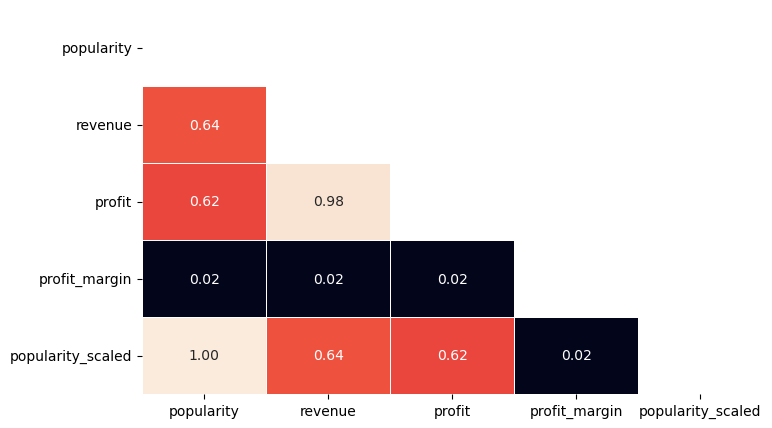

In [80]:
corr = df_popularity.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(corr)) #this is to define the treatment of missing values
fig = plt.subplots(figsize=(8,5))
sns.heatmap(corr,annot=True,fmt='.2f',mask=mask,cbar=None,linewidth=0.5)
plt.show()

Text(0, 0.5, 'Revenue (100 million)')

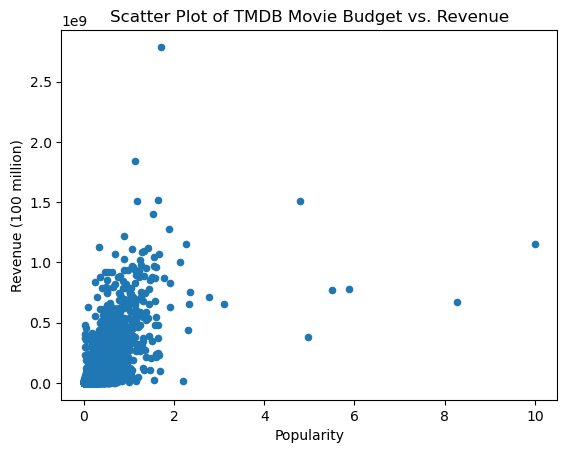

In [81]:
# Popularity VS Revenue

df_popularity.plot(y='revenue',x='popularity_scaled',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue (100 million)")

Text(0, 0.5, 'Revenue (100 million)')

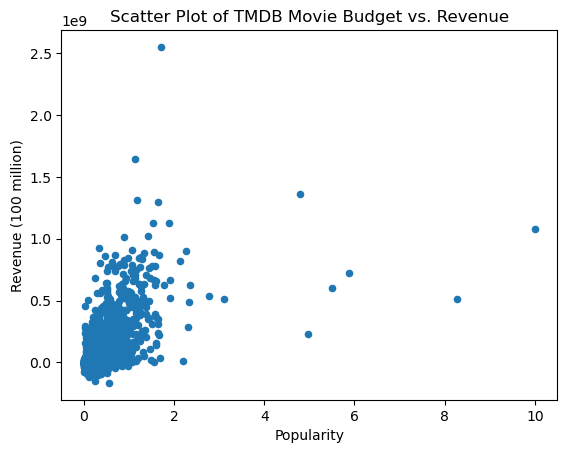

In [82]:
# Popularity VS Profit

df_popularity.plot(y='profit',x='popularity_scaled',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue (100 million)")

## Step 5: Answers to Questions

Q1) What is the relationship of budget and revenue?  
A1) In most cases, a higher budget does result in higher revenue and profit. However, the analysis shows that there are outliers where a high budget results in losses.

Q2) Which genres are popular with people?   
A2) Adventure, Science Fiction and Fantasy are the most popular genres.

Q3) Which director has the highest revenue under his/her belt?  
A3) Jennifer Lee

Q4) Which is the most popular and highest revenue grossing actor?  
A4) Stan Lee

Q5) Which year was the highest revenue and profit collection?  
A5) 2009, Avatar

Q6) Do popularity affect movie revenue and profit?  
A6) Yes, they have a correlation of 0.64 and 0.62 respectively which indicates a strong positive relation with popularity